# 12장. 시계열 데이터
## 12.1 datetime 오브젝트
datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리입니다. datetime 라이브러리에는 
1. 날짜를 처리하는 date 오브젝트, 
2. 시간을 처 리하는 time 오브젝트, 
3. 날짜와 시간을 모두 처리하는 datetime 오브젝트가 포함되어 있습니다. 

앞으로 3개의 오브젝트를 명확히 구분하기 위해 영문을 그대로 살려 date, time, datetime 오브젝트라고 부르겠습니다.

### 12.1.1 datetime 객체 사용하기(238쪽)

In [1]:
from datetime import datetime

In [2]:
now1 = datetime.now() 
print(now1)

2021-12-08 00:20:36.353262


In [3]:
now2 = datetime.today()
print(now2) 

2021-12-08 00:22:10.747077


In [4]:
type(now1)

datetime.datetime

In [5]:
t1 = datetime.now() 
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2021-12-08 00:23:05.126334
1970-01-01 00:00:00
1970-12-12 13:24:34


datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있다는 점입니다. 다 음은 두 datetime 오브젝트의 차이를 구한 것입니다.

python 표준 라이브러리에는 datetime, time을 위한 자료형과 calendar 기능을 제공하고 있다.

| 자료형 | 설명 |
|---|---|
|date|그레고리언 달력을 사용하여 날짜(년, 월, 일)을 저장한다.|
|time|하루 중 시간을 (시, 분, 초, 마이크로초) 단위로 저장한다.|
|datetime|날짜와 시간을 같이 저장한다.|
|timedelta|두 datetime 값 간의 차이를 (day, time)으로 표현한다.<br>timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)|
|timestamp|UTC 1970년1월1일 자정을 기준으로 나노초단위로 표현된 int값|

- 다른 시간 객체들은 기준점이 없으나, timestamp는 UTC라는 기준점이 있다.
- [그레고리언 달력](https://ko.wikipedia.org/wiki/%EA%B7%B8%EB%A0%88%EA%B3%A0%EB%A6%AC%EB%A0%A5)은 현재 세계적으로 통용되는 양력이다.
- [UTC(프랑스어: Temps Universel Coordonné, 영어: Coordinated Universal Time; 협정세계시)](https://ko.wikipedia.org/wiki/%ED%98%91%EC%A0%95_%EC%84%B8%EA%B3%84%EC%8B%9C)는 1972년 1월 1일부터 시행된 국제 표준시로서 그리니치 표준시(GMT)에 기반하므로, GMT라고도 한다.

In [6]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

18969 days, 0:23:05.126334
<class 'datetime.timedelta'>


In [ ]:
diff2 = t2 - t1

print(diff2)
print(type(diff2))

-18814 days, 14:51:27.992090
<class 'datetime.timedelta'>


### 12.1.2 datetime 객체 변환
#### 1) 문자열을 datetime 객체로 변환하기(240쪽)

In [8]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/DataAnal')
!pwd

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/DataAnal


In [9]:
import pandas as pd 
import os
ebola = pd.read_csv('./country_timeseries.csv')

In [10]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [ ]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [11]:
ebola.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
type(ebola['Date'][0])

str

pd.to_datetime 함수를 이용하여 datetime 객체로 변환할 수 있다.

In [15]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [16]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31


#### 2) pd.to_datetime 메소드의 용법
다양한 format을 적용하여 다양한 datetime 데이터를 얻을 수 있다.

In [17]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})
test_df1

,order_day
0,01/01/15
1,02/01/15
2,03/01/15


In [18]:
pd.to_datetime(test_df1.order_day)

0   2015-01-01
1   2015-02-01
2   2015-03-01
Name: order_day, dtype: datetime64[ns]

다양한 날짜 형식의 포매터:
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [19]:
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [ ]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


#### 3) 시간형식 지정자

datetime 포맷 규칙(ISO C89 호환): 년월일은 소문자, 시분초는 대문자로 포맷
<table align="left">
  <tr>
    <th>[ 지시자 ]</th>
    <th>[ 내용 ]</th>
  </tr>
  <tr>
    <td>%y</td>
    <td>연도를 2자리로 축약하여 표시</td>
  </tr>
  <tr>
    <td>%Y</td>
    <td>연도를 4자리로 표시</td>
  </tr>
  <tr>
    <td>%b</td>
    <td>축약된 월 이름</td>
  </tr>
  <tr>
    <td>%B</td>
    <td>축약되지 않은 월 이름</td>
  </tr>
  <tr>
    <td>%m</td>
    <td>숫자로 표현한 월(01~12)</td>
  </tr>
  <tr>
    <td>%d</td>
    <td>일(01~31)</td>
  </tr>
  <tr>
    <td>%H</td>
    <td>24시를 기준으로 한 시(00~23)</td>
  </tr>
  <tr>
    <td>%I</td>
    <td>12시를 기준으로 한 시(01~12)</td>
  </tr>
  <tr>
    <td>%M</td>
    <td>분(00~59)</td>
  </tr>
  <tr>
    <td>%S</td>
    <td>초(00~59)</td>
  </tr>
  <tr>
    <td>%p</td>
    <td>locale 기준 오전(AM) / 오후(PM)을 표시</td>
  </tr>
  <tr>
    <td>%a</td>
    <td>축약된 요일 이름</td>
  </tr>
  <tr>
    <td>%A</td>
    <td>축약되지 않은 요일 이름</td>
  </tr>
  <tr>
    <td>%w</td>
    <td>요일을 숫자로 표시(예: 일요일(6))</td>
  </tr>
  <tr>
    <td>%j</td>
    <td>정수로 표현한 연중 일 수(일차) [001,366].</td>
  </tr>
</table>

#### 4) 시계열 데이터를 구분해서 추출하고 싶어요(243쪽)
now 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지시간을 표현합니다. 하지만 원 하는 시계열 데이터의 시간 요소가 연도, 월, 일뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 합니다. 

다음은 strftime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낸 것입니다.

In [20]:
now = datetime.now()
print(now)

2021-12-08 01:23:28.827790


In [21]:
str(now)

'2021-12-08 01:23:28.827790'

In [22]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2021-12-08


In [23]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime) 

01:23:28


In [24]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime) 

2021-12-08 01:23:28


### 12.1.3 datetime 객체 변환 - read_csv
앞에서는 to_datetime 메서드를 사용하여 문자열로 저장되어 있는 Date 열을 datetime 오브젝트로 변환했습니다. 하지만 datetime 오브젝트로 변환하려는 열을 지정하여 데이 터 집합을 불러오는 것이 더 간단합니다. 

다음 실습을 통해 알아보겠습니다.
#### 1) datetime 객체로 변환하려는 열을 지정하여 데이터 집합 불러오기(244쪽)

In [26]:
ebola1 = pd.read_csv('./country_timeseries.csv', 
                     parse_dates=['Date']) 
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### 2) datetime 객체에서 날짜 정보 추출하기(244쪽)
다음은 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환한 것입니다

In [27]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series) 
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [ ]:
print(type(d1))
print(d1.dtype)
print(type(d1[0]))

<class 'pandas.core.series.Series'>
datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [28]:
print(d1[0].year)

2018


In [29]:
print(d1[0].month)

5


In [30]:
print(d1[0].day)

16


<font color='red'>[Quiz] </font> 요일 정보는 어떻게 출력할까요?
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [31]:
dt1 = d1[0]
dt1

Timestamp('2018-05-16 00:00:00')

In [32]:
# Monday == 0 ... Sunday == 6 : 수요일
dt1.dayofweek

2

In [33]:
# Sunday == 0 ... 토요일 == 6
dt1.isoweekday()

3

In [34]:
dt1.week

20

In [35]:
dt1.weekday()

2

In [36]:
dt1.day_name()

'Wednesday'

In [37]:
dt1.strftime("%a")

'Wed'

In [38]:
weekdays = []
for d in d1:
    weekdays.append(d.strftime("%a"))
weekdays

['Wed', 'Thu', 'Fri']

In [39]:
d1.map(lambda d: d.strftime("%a"))

0    Wed
1    Thu
2    Fri
dtype: object

### 12.1.4 dt 접근자 사용하기
문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용할 수 있었습니다. 

datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있습니다.

#### 1) dt 접근자로 시계열 데이터 정리하기(245쪽)

In [41]:
ebola = pd.read_csv('./country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [ ]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


dt 접근자를 사용하지 않고, index가 3인 데이터의 년,월,일 정보를 추출하는 예이다.

In [42]:
print(ebola['date_dt'][3].year)

2015


In [43]:
type(ebola['date_dt'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [44]:
print(ebola['date_dt'][3].month)

1


In [45]:
print(ebola['date_dt'][3].day)

2


dt 접근자를 이용하며, 쉽게 datetimne 멤버변수인 year, month, day를 이용할 수 있습니다.

In [46]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [47]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [48]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

<font color='red'>[Quiz]</font> str 접근자를 이용하여 Date 컬럼으로 부터 년, 월 일 정보를 추출해보자.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [52]:
ebola.Date.str.split('/')

0        [1, 5, 2015]
1        [1, 4, 2015]
2        [1, 3, 2015]
3        [1, 2, 2015]
4      [12, 31, 2014]
            ...      
117     [3, 27, 2014]
118     [3, 26, 2014]
119     [3, 25, 2014]
120     [3, 24, 2014]
121     [3, 22, 2014]
Name: Date, Length: 122, dtype: object

In [57]:
ebola.Date.str.split('/').str[1]

0       5
1       4
2       3
3       2
4      31
       ..
117    27
118    26
119    25
120    24
121    22
Name: Date, Length: 122, dtype: object

In [59]:
ebola.Date.map(lambda x: x.split('/')[2])

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: Date, Length: 122, dtype: object

## 12.2 시계열 데이터 계산하기
### 12.2.1 에볼라 최초 발병일 계산하기(248쪽)
ebola 데이터는 시간 역순으로 정렬되어 있다.

In [60]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


ebola 최초 발병일을 알아보고, 최초 발병일로부터의 누적 일자를 계산해보자.

In [61]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [62]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


### 12.2.2 파산한 은행의 개수 계산하기(249쪽)

In [65]:
banks = pd.read_csv('./banklist.csv') 
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [64]:
banks_no_dates = pd.read_csv('./banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


열의 5,6 인덱스가 datetime 포맷임을 알고 있으므로, 이를 parse_dates 옵션에 전달한다.

In [67]:
banks = pd.read_csv('./banklist.csv', parse_dates=[5, 6]) 
print(banks.info())
banks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


dt 접근자와 quarter 속성을 이용하면 은행이 파산한 분기를 알 수 있습니다. 

다음은 dt 접근자와 year, quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가한 것입니다.

In [68]:
banks['closing_quarter'], banks['closing_year'] = \
    (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


이제 연도별로 파산한 은행이 얼마나 되는지 알아볼까요? grouby 메서드를 사용하면 연도별로 파산한 은행의 개수를 구할 수 있습니다

In [69]:
closing_year = banks.groupby(['closing_year']).size()

closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

각 연도별, 분기별로 파산한 은행의 개수도 알아보겠습니다. 다음은 banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력한 것입니다.

In [70]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

In [71]:
closing_year_q.unstack()

closing_quarter,1,2,3,4
closing_year,,,,
2000,NaN,NaN,NaN,2.0
2001,1.0,1.0,2.0,NaN
2002,6.0,2.0,1.0,2.0
2003,1.0,1.0,NaN,1.0
2004,3.0,1.0,NaN,NaN
2007,1.0,NaN,1.0,1.0
2008,2.0,2.0,9.0,12.0
2009,21.0,24.0,50.0,45.0
2010,41.0,45.0,41.0,30.0


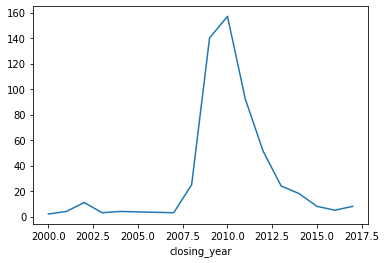

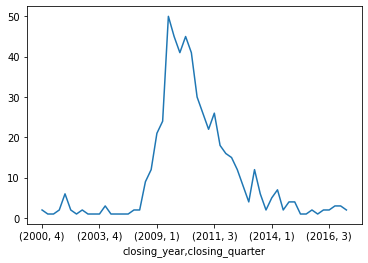

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax = closing_year.plot() 
plt.show()

fig, ax = plt.subplots() 
ax = closing_year_q.plot() 
plt.show()

### 12.2.3 테슬라 주식 데이터로 시간 계산하기(253쪽)
이번에는 pandas-datareader 라이브러리를 이용하여 주식 데이터를 불러오겠습니다. 이 라이브러리는 지금까지 설치한 적이 없는 라이브러리입니다. 다음을 아나콘다 프롬프트에 입력하여 pandas-datareader 라이브러리를 설치하세요.

In [ ]:
# !pip install pandas-datareader

In [ ]:
# pd.__version__

아래 명령을 2 번 실행한 후, Kernel을 restart한 이후, 여기까지 재 실행한다.

In [ ]:
# !pip install "pandas<0.25.0"

다음은 get_data_quanal 메서드에 TSLA라는 문자열을 전달하여 테슬라의 주식 데이 터를 내려받은 다음 to_csv 메서드를 사용하여 data 폴더 안에 ‘tesla_stock_quandl.csv’ 라는 이름으로 저장한 것입니다.

In [ ]:
# pd.core.common.is_list_like = pd.api.types.is_list_like
# import pandas_datareader as pdr

# # tesla에는 데이터프레임이 저장됩니다.
# tesla = pdr.get_data_quandl('TSLA')

# # tesla에 저장된 데이터프레임을 파일로 저장합니다.
# tesla.to_csv('../data/tesla_stock_quandl.csv')

In [ ]:
# print(tesla.head())

In [73]:
tesla = pd.read_csv('./tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [75]:
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


Date 열의 자료형이 datetime 오브젝트로 변환되었습니다. 이제 dt 접근자를 사용할 수 있습니다. 다음은 불린 추출로 2010년 6월의 데이터만 추출한 것입니다.

In [76]:
print(tesla[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  ...  AdjHigh  AdjLow  AdjClose   AdjVolume
1947 2010-06-30  25.79  30.4192  23.30  ...  30.4192   23.30     23.83  17187100.0
1948 2010-06-29  19.00  25.0000  17.54  ...  25.0000   17.54     23.89  18766300.0

[2 rows x 13 columns]


### 12.2.4 datetime 오브젝트와 인덱스 - DatetimeIndex(255쪽)
지금까지의 실습은 대부분 데이터프레임의 행 번호를 인덱스로 사용했지만 datetime 오 브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있어 편리합니다. 

이번에는 datetime 오브젝트를 인덱스로 지정하는 방법에 대해 알아보겠 습니다.

In [77]:
tesla = tesla.set_index('Date')
tesla.index[:5]

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [78]:
print(tesla['2015'].iloc[:5, :5])

              Open     High       Low   Close     Volume
Date                                                    
2015-12-31  238.51  243.450  238.3700  240.01  2715038.0
2015-12-30  236.60  243.634  235.6707  238.09  3697921.0
2015-12-29  230.06  237.720  229.5470  237.19  2406290.0
2015-12-28  231.49  231.980  225.5400  228.95  1901304.0
2015-12-24  230.56  231.880  228.2800  230.57   710277.0


In [ ]:
tesla[::-1]

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0
2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0
2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0


In [79]:
print(tesla['2010-06'].iloc[:, :5])

             Open     High    Low  Close      Volume
Date                                                
2010-06-30  25.79  30.4192  23.30  23.83  17187100.0
2010-06-29  19.00  25.0000  17.54  23.89  18766300.0


[Quiz] 연도별 월별 OHLC와 Volume에 대한 평균값을 구해보자.

In [80]:
years = tesla.reset_index()['Date'].dt.year
months = tesla.reset_index()['Date'].dt.month

In [81]:
meandf = tesla.reset_index().groupby([years, months])[tesla.columns[:5]].mean()
meandf

Open        High         Low       Close        Volume
Date Date                                                              
2010 6      22.395000   27.709600   20.420000   23.860000  1.797670e+07
     7      20.073514   20.640000   18.816195   19.558095  3.075038e+06
     8      19.545455   19.909736   19.080686   19.510909  6.835545e+05
     9      20.779048   21.276162   20.309062   20.740000  8.593286e+05
     10     20.723333   20.992657   20.425810   20.713333  3.118000e+05
...               ...         ...         ...         ...           ...
2017 11    310.819000  314.920945  305.133500  310.482000  7.093090e+06
     12    322.720500  327.071650  318.686500  322.841000  5.448908e+06
2018 1     336.888095  342.841410  332.686905  338.581448  5.853832e+06
     2     336.316842  342.672495  330.162400  335.781842  5.609326e+06
     3     324.434737  328.758947  316.442126  321.670526  6.325510e+06

[94 rows x 5 columns]

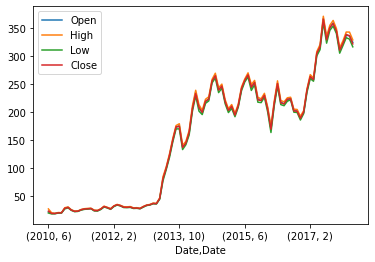

In [82]:
meandf.iloc[:, :4].plot()

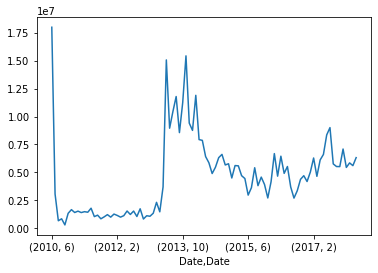

In [83]:
meandf.Volume.plot()

In [87]:
print(type(tesla.reset_index().groupby([years, months])))
type(tesla.resample('M'))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


pandas.core.resample.DatetimeIndexResampler

resample의 주기를 설정하여 groupby와 같이 간단히 평균을 구할 수 있다.
- 주기 정보는 https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects 참고

In [89]:
tesla.resample('M')[tesla.columns[:5]].mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-30,22.395000,27.709600,20.420000,23.860000,1.797670e+07
2010-07-31,20.073514,20.640000,18.816195,19.558095,3.075038e+06
2010-08-31,19.545455,19.909736,19.080686,19.510909,6.835545e+05
2010-09-30,20.779048,21.276162,20.309062,20.740000,8.593286e+05
2010-10-31,20.723333,20.992657,20.425810,20.713333,3.118000e+05
...,...,...,...,...,...
2017-11-30,310.819000,314.920945,305.133500,310.482000,7.093090e+06
2017-12-31,322.720500,327.071650,318.686500,322.841000,5.448908e+06
2018-01-31,336.888095,342.841410,332.686905,338.581448,5.853832e+06


### 12.2.5 시간 간격과 인덱스 - TimedeltaIndex(256쪽)
예를 들어 주식 데이터에서 최초 5일간 수집된 데이터만 살펴보고 싶다면 어떻게 해야 할 까요? 이런 경우에는 시간 간격을 인덱스로 지정하여 데이터를 추출하면 됩니다. 

이번에는 datetime 오브젝트를 인덱스로 지정하는 것이 아니라 시간 간격을 인덱스로 지정하여 진 행하겠습니다.

In [90]:
tesla = pd.read_csv('./tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())
tesla.index = tesla['Date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [91]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()

print(tesla.head())

                 Date    Open    High  ...  AdjClose   AdjVolume  ref_date
Date                                   ...                                
2018-03-27 2018-03-27  304.00  304.27  ...    279.18  13696168.0 2828 days
2018-03-26 2018-03-26  307.34  307.59  ...    304.18   8324639.0 2827 days
2018-03-23 2018-03-23  311.25  311.61  ...    301.54   6600538.0 2824 days
2018-03-22 2018-03-22  313.89  318.82  ...    309.10   4914307.0 2823 days
2018-03-21 2018-03-21  310.25  322.44  ...    316.53   5927881.0 2822 days

[5 rows x 14 columns]


In [92]:
tesla.index = tesla['ref_date']

print(tesla.iloc[:5, :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


최초 10일 데이터를 가져오는 경우

In [93]:
tesla['10 days':]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
ref_date,,,,,,,,,,,,,,
10 days,2010-07-09,17.58,17.9000,16.55,17.40,4050600.0,0.0,1.0,17.58,17.9000,16.55,17.40,4050600.0,10 days
9 days,2010-07-08,16.14,17.5200,15.57,17.46,7711400.0,0.0,1.0,16.14,17.5200,15.57,17.46,7711400.0,9 days
8 days,2010-07-07,16.40,16.6300,14.98,15.80,6921700.0,0.0,1.0,16.40,16.6300,14.98,15.80,6921700.0,8 days
7 days,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,7 days
3 days,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,3 days
2 days,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2 days
1 days,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,1 days
0 days,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,0 days


### 12.2.6 시간 범위와 인덱스 (258쪽)
앞에서 사용한 주식 데이터는 특정 일에 누락된 데이터가 없었습니다. 하지만 가끔은 데이 터를 수집하지 못한 날도 있을 수 있겠죠. 만약 특정 일에 누락된 데이터도 포함시켜 데이 터를 살펴보려면 어떻게 해야 할까요? 

이런 경우에는 임의로 시간 범위를 생성하여 인덱스 로 지정해야 합니다.

___
데이터를 살펴보면, 2015-01-01 및 2014-03-23일의 데이터가 누락된 것을 확인할 수 있다.

In [94]:
ebola = pd.read_csv('./country_timeseries.csv', parse_dates=[0]) 
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [95]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


다음은 date_range 메서드를 사용하여 2014년 12월 31일부터 2015년 01월 05일 사 이의 시간 인덱스(DatetimeIndex)를 생성한 것입니다.

In [96]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05') 
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [97]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range).iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0
2015-01-01,NaT,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0


In [ ]:
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


In [98]:
pd.date_range(start='2014-12-31', end='2015-01-05', freq='B')

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-05'], dtype='datetime64[ns]', freq='B')

### 12.2.7 freq 속성을 이용한 시간 주기
pandas에서 빈도는 **기본 빈도(base freq)**와 **배수**의 조합으로 구성된다:

기본 빈도는 아래와 같다.

| Date Offset | Frequency String | Description |
|------------------------------------------|------------------|-------------------------------------------------------|
| DateOffset | None | Generic offset class, defaults to 1 calendar day |
| BDay or BusinessDay | 'B' | business day (weekday) |
| CDay or CustomBusinessDay | 'C' | custom business day |
| Week | 'W' | one week, optionally anchored on a day of the week |
| WeekOfMonth | 'WOM' | the x-th day of the y-th week of each month |
| LastWeekOfMonth | 'LWOM' | the x-th day of the last week of each month |
| MonthEnd | 'M' | calendar month end |
| MonthBegin | 'MS' | calendar month begin |
| BMonthEnd or BusinessMonthEnd | 'BM' | business month end |
| BMonthBegin or BusinessMonthBegin | 'BMS' | business month begin |
| CBMonthEnd or CustomBusinessMonthEnd | 'CBM' | custom business month end |
| CBMonthBegin or CustomBusinessMonthBegin | 'CBMS' | custom business month begin |
| SemiMonthEnd | 'SM' | 15th (or other day_of_month) and calendar month end |
| SemiMonthBegin | 'SMS' | 15th (or other day_of_month) and calendar month begin |
| QuarterEnd | 'Q' | calendar quarter end |
| QuarterBegin | 'QS' | calendar quarter begin |
| BQuarterEnd | 'BQ | business quarter end |
| BQuarterBegin | 'BQS' | business quarter begin |
| FY5253Quarter | 'REQ' | retail (aka 52-53 week) quarter |
| YearEnd | 'A' | calendar year end |
| YearBegin | 'AS' or 'BYS' | calendar year begin |
| BYearEnd | 'BA' | business year end |
| BYearBegin | 'BAS' | business year begin |
| FY5253 | 'RE' | retail (aka 52-53 week) year |
| Easter | None | Easter holiday |
| BusinessHour | 'BH' | business hour |
| CustomBusinessHour | 'CBH' | custom business hour |
| Day | 'D' | one absolute day |
| Hour | 'H' | one hour |
| Minute | 'T' or 'min' | one minute |
| Second | 'S' | one second |
| Milli | 'L' or 'ms' | one millisecond |
| Micro | 'U' or 'us' | one microsecond |
| Nano | 'N' | one nanosecond |


각 기본 빈도(base freq)에는 날짜 offset 객체를 사용할 수 있다.
- pandas.tseries.offsets 모듈에서 필요한 offset class를 가져와 사용할 수 있다.
- 전체 offsets이 어떤 것이 있는 지 아래와 같이 확인할 수 있다.


#### 1) 시간 범위의 주기 설정하기(260쪽)
다음은 date_range 메서드의 freq 인잣값을 B로 설정하여 평일만 포함시킨 DatetimeIndex를 만든 것 입니다

In [99]:
pd.date_range('2017-01-01', '2017-01-06', freq='B')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')

- date_range는 end date를 포함한다.

#### 2) 에볼라의 확산 속도 비교하기(261쪽)
나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 좋습니다. 왜 그럴까요? 

일단 ebola 데이터프레임으로 그래프를 그려보고 에볼라의 확산 속도를 비교하는 데 어떤 문제가 있는지 그리고 해결 방법은 무엇인지 알아보겠습니다.

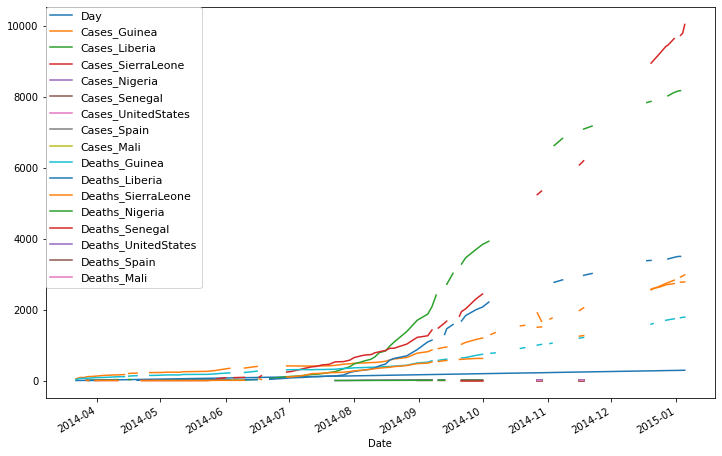

In [100]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots() 
ax = ebola.iloc[:, 1:].plot(ax=ax, figsize=(12,8))
ax.legend(fontsize=11, loc=2, borderaxespad=0.) 
plt.show()

그런데 과정 1의 그래프는 각 나라의 에볼라 발병일이 달라 그래프가 그려지기시작한 지점도 다릅니다. 

달리기 속도를 비교하려면 같은 출발선에서 출발하여 시간을 측정해야 겠죠? 에볼라의 확산 속도도 같은 방법으로 측정해야 합니다. 

즉, 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교할 수 있습니다.

In [101]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']] 
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


#### 3) 그래프를 그리기 위한 데이터프레임 준비하기
다음은 Date 열의 자료형을 datetime 오브젝트로 변환하여 ebola 데이터프레임을 다시 생성한 것입니다. 

그런데 중간에 아예 날짜가 없는 데이터(2015년 01월 01일)도 있습니다. 이 데이터도 포함시켜야 확산 속도를 제대로 비교할 수 있습니다.

In [102]:
ebola = pd.read_csv('./country_timeseries.csv',  
                    parse_dates=['Date'])

print(ebola.head().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


다음은 Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx에 저장한 것입니다. 

이렇게 하면 날짜가 아예 없 었던 데이터의 인덱스를 생성할 수 있습니다.

In [103]:
ebola.index = ebola['Date']

new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [104]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


그런데 new_idx를 살펴보면 ebola 데이터 집합에 있는 시간 순서와 반대로 생성되어, reversed 메서드를 사용하여 인덱스를 반대로 뒤집은 것입니다.

In [105]:
new_idx = reversed(new_idx)

이제 reindex 메소드를 이용하여, 새로운 인덱스를 지정하며, 아예 데이터가 없었던 일자도, 인덱스에 포함되게 합니다.

In [106]:
ebola = ebola.reindex(new_idx)

In [107]:
print(ebola.head().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [108]:
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


#### 4) 각 나라의 에볼라 발병일 옮기기
다음은 last_valid_index, first_valid_index 메서드를 사용하여 각 나라의 에볼라 발병일을 구한 것입니다. 각각의 메서드는 유효한 값이 있는 첫 번째와 마지막 인덱스를 반환합니다. 다음을 입력하고 결과를 확인해 보세요

In [109]:
last_valid = ebola.apply(pd.Series.last_valid_index) 
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [110]:
first_valid = ebola.apply(pd.Series.first_valid_index) 
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [111]:
earliest_date = ebola.index.min() 
print(earliest_date)

2014-03-22 00:00:00


각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면:
- 각 나라의 에볼라 발병일(last_valid)에서
- 에볼라가 가장 처음 발병한 날 (earliest_date)을 뺀 만큼(shift_values)
- 옮기면 된다.

In [112]:
shift_values = last_valid - earliest_date 
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [ ]:
shift_values[4].days

5

이제 각 나라의 에볼라 발병일을 옮기면 됩니다. 다음은 shift 메서드를 사용하여 모든 열의 값을 shift_values 값만큼 옮긴 것입니다. shift 메서드는 인잣값만큼 데이터를 밀어 내는 메서드입니다

In [ ]:
# DataFrame에 대해 for loop를 실행하면, column name이 반복하여 출력된다.
for col in ebola:
    print(col)
    break

Date


- shift를 통해 첫 데이터에 결측치가 생기고
- 마지막 데이터에 있던 결측치가 이전의 데이터로 메꿔진다.

In [113]:
ebola["Cases_SierraLeone"].head(10), ebola["Cases_SierraLeone"].tail(10)

(Date
 2015-01-05    10030.0
 2015-01-04     9780.0
 2015-01-03     9722.0
 2015-01-02        NaN
 2015-01-01        NaN
 2014-12-31     9633.0
 2014-12-30        NaN
 2014-12-29        NaN
 2014-12-28     9446.0
 2014-12-27     9409.0
 Name: Cases_SierraLeone, dtype: float64, Date
 2014-03-31    2.0
 2014-03-30    NaN
 2014-03-29    NaN
 2014-03-28    2.0
 2014-03-27    6.0
 2014-03-26    NaN
 2014-03-25    NaN
 2014-03-24    NaN
 2014-03-23    NaN
 2014-03-22    NaN
 Name: Cases_SierraLeone, dtype: float64)

In [ ]:
ebola["Cases_SierraLeone"].shift(5).head(10), ebola["Cases_SierraLeone"].shift(5).tail(10)

(Date
 2015-01-05        NaN
 2015-01-04        NaN
 2015-01-03        NaN
 2015-01-02        NaN
 2015-01-01        NaN
 2014-12-31    10030.0
 2014-12-30     9780.0
 2014-12-29     9722.0
 2014-12-28        NaN
 2014-12-27        NaN
 Name: Cases_SierraLeone, dtype: float64,
 Date
 2014-03-31    NaN
 2014-03-30    2.0
 2014-03-29    NaN
 2014-03-28    NaN
 2014-03-27    2.0
 2014-03-26    2.0
 2014-03-25    NaN
 2014-03-24    NaN
 2014-03-23    2.0
 2014-03-22    6.0
 Name: Cases_SierraLeone, dtype: float64)

모든 컬럼에 대해 적용하면:

In [114]:
ebola_dict = {} 
for idx, col in enumerate(ebola):
    d = shift_values[idx].days 
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [121]:
ebola_shift = pd.DataFrame(ebola_dict)
ebola_shift.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,NaT,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


이제 에볼라의 최초 발병일(2014-03-22)을 기준으로 모든 열의 데이터가 옮겨졌습니다.

마지막으로 인덱스를 Day 열로 지정하고 그래프에 없는 Date, Day 열은 삭제하 면 그래프를 그리기 위한 데이터프레임이 완성됩니다.

In [125]:
ebola_shift['Day'] = ebola_shift['Day'].interpolate().astype(int)

In [126]:
ebola_shift.index = ebola_shift['Day'] 
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  ...  Deaths_Spain  Deaths_Mali
Day                               ...                           
4            86.0            8.0  ...           1.0          NaN
3            86.0            NaN  ...           NaN          NaN
2            86.0            7.0  ...           NaN          NaN
1             NaN            3.0  ...           NaN          NaN
0            49.0            8.0  ...           1.0          1.0

[5 rows x 16 columns]


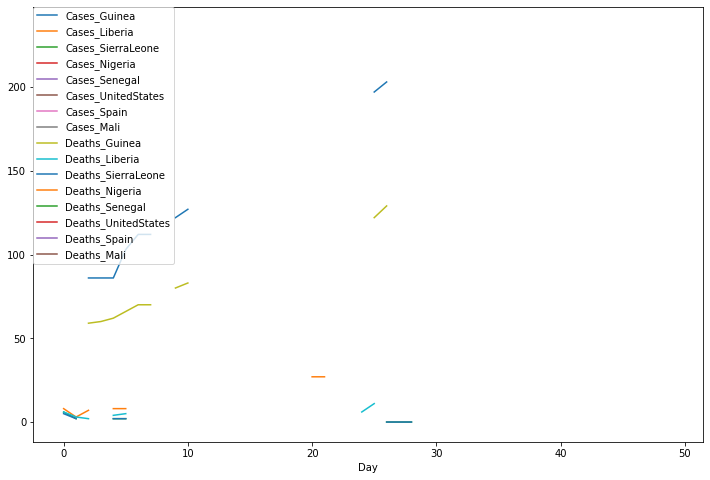

In [127]:
fig, ax = plt.subplots(figsize=(12,8)) 
ax = ebola_shift.iloc[-50:].plot(ax=ax)
ax.legend(fontsize=10, loc=2, borderaxespad=0.) 
plt.show()

[Quiz]
1. 결측치를 interpolate로 보간한다.
2. 100일간 만 관찰한다. 이를 위해 100 Day만 자른다.
2. 2개의 도화지를 준비해서 하나는 Cases, 하나는 Death만 그린다.

In [128]:
ebola_shift.shape

(290, 16)

In [129]:
ebola_shift.index = pd.Series(ebola_shift.index).interpolate()

In [130]:
ebola_shift.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
289,2776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
4,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [132]:
ebola_shift = ebola_shift.sort_index()
ebola_shift

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
1,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,2769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
ebola_shift_nafill = ebola_shift.interpolate()
ebola_shift_nafill.shape

(290, 16)

In [ ]:
ebola_shift_nafill.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
0.0,49.0,8.0,6.0,0.00,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.00,0.0,0.0,1.0,1.0
1.0,67.5,3.0,2.0,0.25,1.0,1.0,1.0,1.0,44.0,3.0,2.0,0.25,0.0,0.0,1.0,1.0
2.0,86.0,7.0,2.0,0.50,1.0,1.0,1.0,1.0,59.0,2.0,2.0,0.50,0.0,0.0,1.0,1.0
3.0,86.0,7.5,2.0,0.75,1.0,1.0,1.0,1.0,60.0,3.0,2.0,0.75,0.0,0.0,1.0,1.0
4.0,86.0,8.0,2.0,1.00,1.0,1.0,1.0,1.0,62.0,4.0,2.0,1.00,0.0,0.0,1.0,1.0


In [ ]:
ebola_shift_nafill.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
285.0,2743.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1748.333333,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
286.0,2756.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1757.666667,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
287.0,2769.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1767.000000,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
288.0,2775.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1781.000000,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
289.0,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.000000,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0


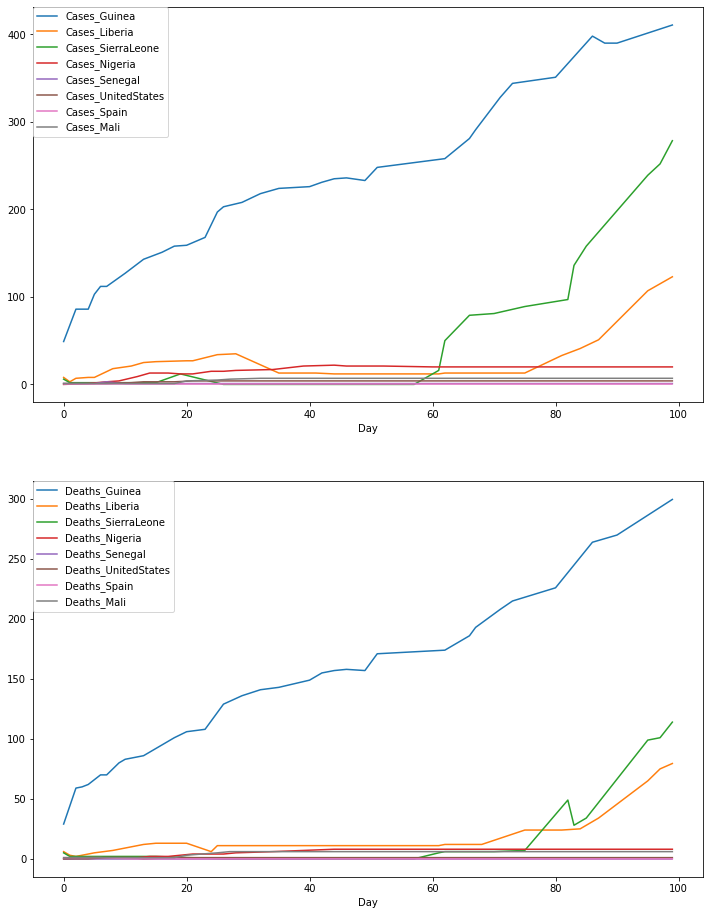

In [134]:
fig, axes = plt.subplots(2, 1, figsize=(12,16)) 
ax1 = ebola_shift_nafill.iloc[:100,:8].plot(ax=axes[0])
ax1.legend(fontsize=10, loc=2, borderaxespad=0.)

ax2 = ebola_shift_nafill.iloc[:100,8:].plot(ax=axes[1])
ax2.legend(fontsize=10, loc=2, borderaxespad=0.) 
plt.show()